In [1]:
from google.colab import drive
drive.mount('/content/drive/')

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/DeepShack/train')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [0]:
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from model import MultiScaleCNN, FullyConnected
from image_handlers import ImageLoader, ShackCamLoader

#  Multi-Scale CNN model training strategy 

1. Train a model with mall data
2. Further train the model with ShackCam data
3. Adding FC layers and training only the FC layers by setting `mscnn_layer.trainable = False`

# 1. Train a model with mall data

### Load mall data

In [0]:
new_shape = 160

Total image samples 2000


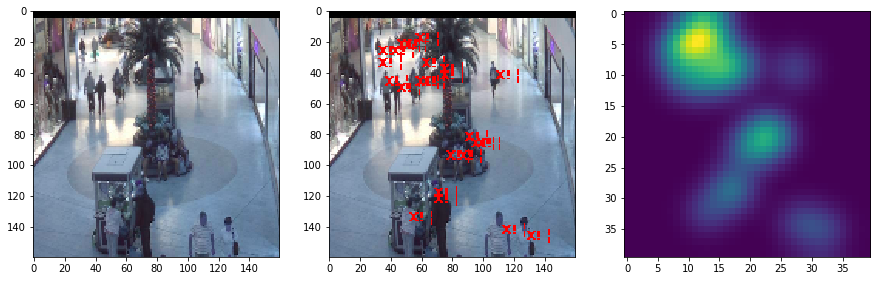

In [0]:
mall = ImageLoader(new_shape=new_shape, image_dir='data/mall')
mall.load_train_data()
mall.plot_image(filename='seq_000499.jpg')
print('Total image samples', mall.count)

### Create a model

In [0]:
input_shape = (new_shape, new_shape, 3)

In [0]:
model = MultiScaleCNN(input_shape=input_shape, name='mall')

Instructions for updating:
Colocations handled automatically by placer.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 160, 160, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 160, 160, 64) 331840      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 160, 160, 64) 200768      conv2d[0][0]                     
_____________________________________

###  Split data to train/test

In [0]:
train_size = 0.8

In [0]:
x_train, x_test, y_train, y_test = train_test_split(mall.org_img, mall.gaussian_img, train_size=train_size)
print('x_train', x_train.shape, 'x_test', x_test.shape)
print('y_train', y_train.shape, 'y_test', y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_train (1600, 160, 160, 3) x_test (400, 160, 160, 3)
y_train (1600, 40, 40, 1) y_test (400, 40, 40, 1)


### Assign optimizer and compile a model

Instructions for updating:
Use tf.cast instead.
Train on 1440 samples, validate on 160 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
1440/1440 [==============================] - 210s 146ms/sample - loss: 1.2073 - val_loss: 0.7582
Epoch 2/30
1440/1440 [==============================] - 155s 107ms/sample - loss: 0.6399 - val_loss: 0.5505
Epoch 3/30
1440/1440 [==============================] - 156s 108ms/sample - loss: 0.4958 - val_loss: 0.4466
Epoch 4/30
1440/1440 [==============================] - 157s 109ms/sample - loss: 0.4103 - val_loss: 0.3761
Epoch 5/30
1440/1440 [==============================] - 156s 108ms/sample - loss: 0.3493 - val_loss: 0.3235
Epoch 6/30
1440/1440 [==============================] - 157s 109ms/sample - loss: 0.3027 - val_loss: 0.2823
Epoch 7/30
1440/1440 [==============================] - 158s 110ms/sample - loss: 0.2655 - val_loss: 0.2490
Epoch 8/30
1440/1440 [==============================] - 157s 109ms/sample - loss: 0.2352 - val_loss: 

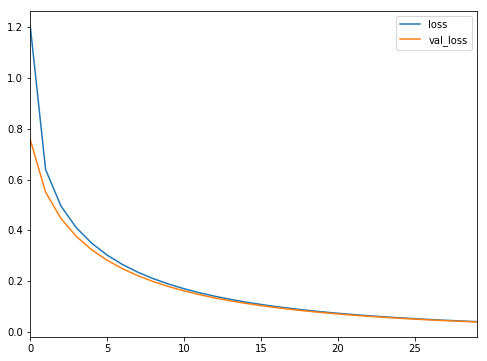

In [0]:
model.train(x_train, y_train, epochs=30, batch_size=32)

In [0]:
model.evaluate(x_test, y_test)

400/400 [==============================] - 17s 43ms/sample - loss: 0.0394
Train score: 0.04061785298917028
Test score: 0.039385420829057695


# 2. Further train the same model with ShackCam data

### Load shackcam data

Total image samples 3878


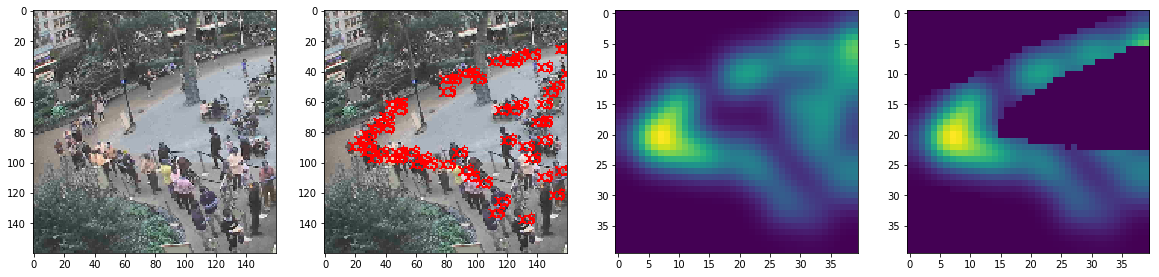

In [6]:
shackcam = ShackCamLoader(new_shape=new_shape, image_dir='data/shackcam')
shackcam.load_train_data()
shackcam.plot_image(i=500)
print('Total image samples', shackcam.count)

### Split data to train/test

In [8]:
x_train, x_test, y_train, y_test = train_test_split(shackcam.org_img, shackcam.gaussian_img, 
                                                    train_size=train_size)
print('x_train', x_train.shape, 'x_test', x_test.shape)
print('y_train', y_train.shape, 'y_test', y_test.shape)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


x_train (3102, 160, 160, 3) x_test (776, 160, 160, 3)
y_train (3102, 40, 40, 1) y_test (776, 40, 40, 1)


### Load pre-trained weights

In [11]:
model = MultiScaleCNN(input_shape=input_shape, name='shackcam', 
                      existing_model_path='results/mall_model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 160, 160, 3)  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 160, 160, 64) 15616       input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 160, 160, 64) 331840      conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 1

### Assign optimizer and compile a model

Train on 2791 samples, validate on 311 samples
Epoch 1/5
2791/2791 [==============================] - 371s 133ms/sample - loss: 0.0072 - val_loss: 0.0017
Epoch 2/5
2791/2791 [==============================] - 289s 104ms/sample - loss: 0.0018 - val_loss: 0.0015
Epoch 3/5
2791/2791 [==============================] - 292s 105ms/sample - loss: 0.0018 - val_loss: 0.0015
Epoch 4/5
2791/2791 [==============================] - 289s 104ms/sample - loss: 0.0018 - val_loss: 0.0015
Epoch 5/5
2791/2791 [==============================] - 290s 104ms/sample - loss: 0.0018 - val_loss: 0.0015


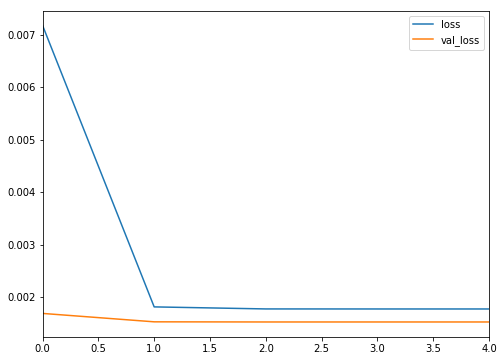

In [12]:
model.train(x_train, y_train, lr=0.0005, epochs=5, batch_size=32)

### Save results and inspect loss

In [13]:
model.evaluate(x_test, y_test)

776/776 [==============================] - 20s 26ms/sample - loss: 0.0017
Train score: 0.00177912889161911
Test score: 0.0016889252481482847


# Adding FC layers and training only the FC layers

### Read line counts, align order as shackcam annotations, remove files without counts

In [0]:
counts = pd.read_csv('data/shackcam/line_counts.csv', names=['file', 'line_count'], header=None)
counts = counts[counts.file.isin(shackcam.files)]
masked_gaussian_img = np.array([shackcam.mask_img(shackcam.data[f]['gaussian_img']) for f in counts.file])

In [11]:
x_train, x_test, y_train, y_test = train_test_split(masked_gaussian_img, counts.line_count.values, 
                                                    train_size=train_size)
print('x_train', x_train.shape, 'x_test', x_test.shape)
print('y_train', y_train.shape, 'y_test', y_test.shape)

x_train (3101, 40, 40, 1) x_test (776, 40, 40, 1)
y_train (3101,) y_test (776,)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
masked_gaussian_img.shape

(3877, 40, 40, 1)

In [16]:
input_shape = (new_shape//4, new_shape//4, 1)
model = FullyConnected(input_shape=input_shape, name='shackcam_fc')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
max_pooling2d_1 (MaxPooling2 (None, 20, 20, 1)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               205312    
_________________________________________________________________
dropout_3 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 513       
Total params: 205,825
Trainable params: 205,825
Non-trainable params: 0
_________________________________________________________________


Train on 2790 samples, validate on 311 samples
Epoch 1/30
2790/2790 [==============================] - 1s 325us/sample - loss: 44.9444 - val_loss: 27.2660
Epoch 2/30
2790/2790 [==============================] - 0s 34us/sample - loss: 45.4626 - val_loss: 27.3814
Epoch 3/30
2790/2790 [==============================] - 0s 45us/sample - loss: 43.3426 - val_loss: 26.5833
Epoch 4/30
2790/2790 [==============================] - 0s 34us/sample - loss: 43.8861 - val_loss: 27.2573
Epoch 5/30
2790/2790 [==============================] - 0s 33us/sample - loss: 46.9461 - val_loss: 26.9957
Epoch 6/30
2790/2790 [==============================] - 0s 45us/sample - loss: 43.9479 - val_loss: 26.4673
Epoch 7/30
2790/2790 [==============================] - 0s 34us/sample - loss: 45.7293 - val_loss: 28.4778
Epoch 8/30
2790/2790 [==============================] - 0s 33us/sample - loss: 47.7189 - val_loss: 26.7635
Epoch 9/30
2790/2790 [==============================] - 0s 33us/sample - loss: 43.9634 - val_los

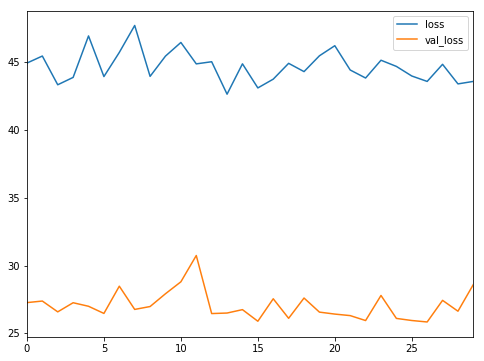

In [21]:
model.train(x_train, y_train, lr=0.005, epochs=30, batch_size=128)

In [22]:
model.evaluate(x_test, y_test)

776/776 [==============================] - 0s 63us/sample - loss: 31.0752
Train score: 43.59083804468955
Test score: 31.075190848910932


### Predict

7.5526934

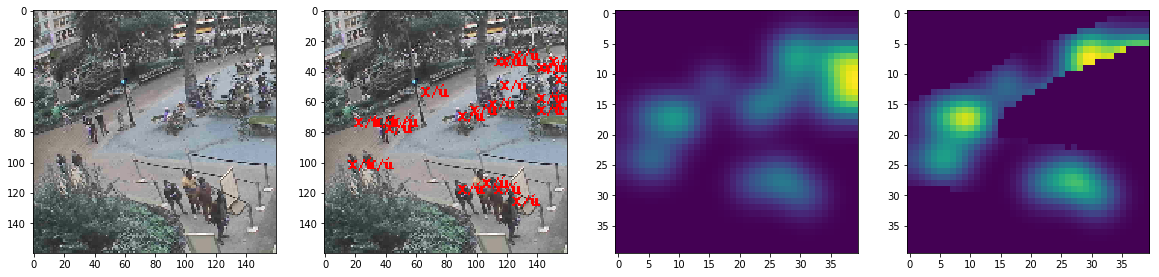

In [29]:
i = 34
shackcam.plot_image(i=i)
model.model.predict(shackcam.gaussian_img[i].reshape((1, *input_shape)))[0][0]